In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def dibujar(gp):
    plt.grid(True)
    plt.scatter(gp[0], gp[1]) # dibula la posicion de la meta
    plt.plot([0,0,10, 10,0], [0,10,10,0,0]) # dibujamos un cuadro delimitando el espacio de trabajo

In [16]:
expandidos = []
mov = 0.5 # tamanio de paso del robot

In [17]:
class Obstaculo():
    def __init__(self, v1, v2):
        self.v1 = v1 # esquina superior
        self.v2 = v2 # esquina inferior

    def en_colision(self, punto):
        if self.v1[0] <= punto[0] <= self.v2[0] and self.v2[1] <= punto[1] <= self.v1[1]:
            return True
        return False
    
    def dibuja(self):
        x = [self.v1[0], self.v2[0], self.v2[0], self.v1[0], self.v1[0]]
        y = [self.v1[1], self.v1[1], self.v2[1], self.v2[1], self.v1[1]]
        plt.plot(x,y)
        


In [18]:
def es_punto_valido(punto, obstaculos, limites):
    # esta en el limite permitido?
    if limites[0] <= punto[0] <= limites[2] and limites[1] <= punto[1] <= limites[3] :
        # Hay colision
        for o in obstaculos:
            if o.en_colision(punto):
                return False
        return True
    return False

In [19]:
class Nodo():
    def __init__(self, pos, papa = None):
        self.pos = pos
        self.hijos = []
        self.papa = papa
        self.expandidos = []

    def genera_hijos(self, obstaculos, limites):
        global expandidos
        
        # uno arriba
        pos_arriba = self.pos[:]
        pos_arriba[1] += mov

        # uno abajo
        pos_abajo = self.pos[:]
        pos_abajo[1] -= mov
        
        # uno izq
        pos_izq = self.pos[:]
        pos_izq [0] -= mov
        
        # uno der
        pos_der = self.pos[:]
        pos_der[0] += mov
        
        # diagonales

        if es_punto_valido(pos_arriba, obstaculos, limites):
            # self.hijos.append(Nodo(pos_arriba, self))
            self.hijos.append(self.__class__(pos_arriba, self))

        if es_punto_valido(pos_abajo, obstaculos, limites):
            self.hijos.append(self.__class__(pos_abajo, self))
        
        if es_punto_valido(pos_izq, obstaculos, limites):
            self.hijos.append(self.__class__(pos_izq, self))
        
        if es_punto_valido(pos_der, obstaculos, limites):
            self.hijos.append(self.__class__(pos_der, self))

        expandidos += self.hijos[:]


    def __eq__(self, n2):
        return self.pos == n2.pos

    def __str__(self):
        s = f"{self.pos[0]}, {self.pos[1]}"
        return s

    def bpp(self, meta, robot, visitados = []):
        
        if self.pos == meta:
            return [self]
        
        if self in visitados:
            return None
        
        self.genera_hijos(robot.obstaculos, robot.limites)
        visitados.append(self)

        for h in self.hijos:
            resp = h.bpp(meta, robot, visitados)
            if resp:
                
                resp.append(self)
                return resp
    
        return None

    def bpa(self, meta, robot, visitados = []):
        
        if self.pos == meta:
            return [self]
        
        if self in visitados:
            return None
        
        self.genera_hijos(robot.obstaculos, robot.limites)
        visitados.append(self)

        por_visitar = self.hijos[:]

        while por_visitar!= []:
            h = por_visitar.pop(0)

            if h in visitados:
                continue
        
            if h.pos == meta:
                camino = [h]
                papa = h.papa
                while papa:
                    camino.append(papa)
                    papa = papa.papa
                print("camino guardado...")

                camino.reverse()
                return camino
            
            h.genera_hijos(robot.obstaculos, robot.limites)
            visitados.append(h)
            por_visitar += h.hijos
        
        return None

In [20]:
class Robot():
    def __init__(self, pos = [5,5], limites = [0,0,10,10], obstaculos = []):
        self.pos = pos
        self.limites = limites
        self.obstaculos = obstaculos
        self.trajectory = []
    
    def agrega_obstaculo(self, obs):
        self.obstaculos.append(obs)

    def plot_robot(self):
        plt.scatter(self.pos[0], self.pos[1])

    def BPP(self, meta, visitados = []):
        raiz = Nodo(self.pos)
        camino = raiz.bpp(meta, self)
        self.trajectory = []
        for paso in camino:
            self.trajectory += paso.pos
        return camino

    def BPA(self, meta, visitados = []):
        raiz = Nodo(self.pos)
        camino = raiz.bpa(meta, self)
        self.trajectory = []

        for paso in camino:
            self.trajectory += paso.pos
        return camino
        


In [21]:
expandidos = []

 expandidos 827


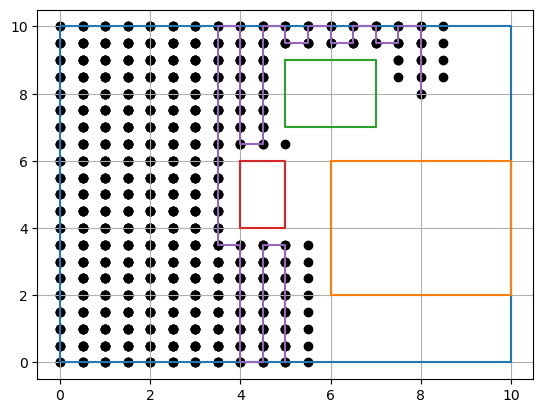

In [22]:
wall_E = Robot([5,0])
wall_E.agrega_obstaculo(Obstaculo([6,6],[10,2]))
wall_E.agrega_obstaculo(Obstaculo([5,9],[7,7]))
wall_E.agrega_obstaculo(Obstaculo([4,6],[5,4]))


dibujar([8,8])
for obstaculo in wall_E.obstaculos:
    obstaculo.dibuja()
wall_E.plot_robot()

wall_E.BPP(meta=[8,8])
plt.plot(wall_E.trajectory[0::2], wall_E.trajectory[1::2])
for p in expandidos:
    plt.scatter(p.pos[0], p.pos[1], c="k")

print(f" expandidos {len(expandidos)}")


camino guardado...
 expandidos 843


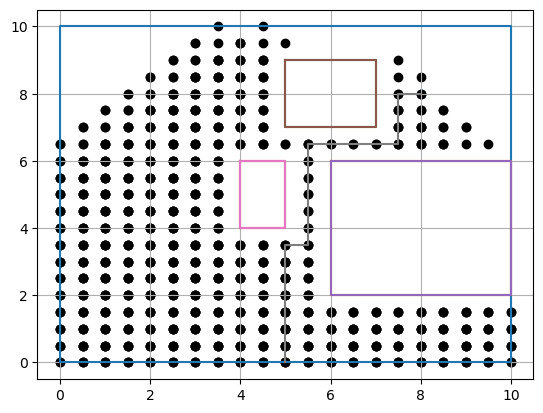

In [23]:
expandidos = []
wall_E2 = Robot([5,0])
wall_E2.agrega_obstaculo(Obstaculo([6,6],[10,2]))
wall_E2.agrega_obstaculo(Obstaculo([5,9],[7,7]))
wall_E2.agrega_obstaculo(Obstaculo([4,6],[5,4]))

dibujar([8,8])
for obstaculo in wall_E2.obstaculos:
    obstaculo.dibuja()
wall_E2.plot_robot()

wall_E2.BPA(meta=[8,8])
plt.plot(wall_E2.trajectory[0::2], wall_E2.trajectory[1::2])

for p in expandidos:
    plt.scatter(p.pos[0], p.pos[1], c="k")

print(f" expandidos {len(expandidos)}")

In [24]:
class NodoHeuristica(Nodo):
    def __init__(self, pos, papa = None):
        super(NodoHeuristica, self).__init__(pos, papa)
        if papa:
            self.costo = papa.costo + 1 # del nodo padre a este nodo
        else:
            self.costo = 0
        self.h = float("inf")

    
    def heuristica(self, meta):
        self.h = abs(self.pos[0] - meta[0]) + abs(self.pos[1] - meta[1])
        return self.h
    
    def f_n(self, meta):
        self.h = abs(self.pos[0] - meta[0]) + abs(self.pos[1] - meta[1]) + self.costo
        return self.h

    def bgreedy(self, meta, robot):
              
        visitados = []
        franja = [self] # por visitar
        while franja != []:
            h = franja.pop(0)
            if h in visitados:
                continue

            if h.pos == meta:
                print("metaaaaaaa")
                camino = [h]
                papa = h.papa
                while papa:
                    camino.append(papa)
                    papa = papa.papa
                camino.reverse()
                return camino
            
            h.genera_hijos(robot.obstaculos, robot.limites)
            
            for i in h.hijos:
                i.heuristica(meta)
            
            franja += h.hijos
            franja.sort()
            visitados.append(h)


    def astar(self, meta, robot):
              
        visitados = []
        franja = [self] # por visitar
        while franja != []:
            h = franja.pop(0)

            if h in visitados:
                continue

            if h.pos == meta:
                print("metaaaaaaa")
                camino = [h]
                papa = h.papa
                while papa:
                    camino.append(papa)
                    papa = papa.papa
                camino.reverse()
                return camino
            
            h.genera_hijos(robot.obstaculos, robot.limites)
            
            for i in h.hijos:
                i.f_n(meta)
            
            franja += h.hijos
            franja.sort()
            visitados.append(h)


    def __lt__(self, n2):
        return self.h < n2.h


In [25]:
class RobotHeur(Robot):

    def BGREEDY(self, meta):
        raiz = NodoHeuristica(self.pos)
        camino = raiz.bgreedy(meta, self)
        if camino:
            self.trajectory = []
            for paso in camino:
                self.trajectory += paso.pos
        else:
            print("Camino no encontrado")
        return camino

    def ASTAR(self, meta):
        raiz = NodoHeuristica(self.pos)
        camino = raiz.astar(meta, self)
        if camino:
            self.trajectory = []
            for paso in camino:
                self.trajectory += paso.pos
        else:
            print("Camino no encontrado")
        return camino

metaaaaaaa
 expandidos 64


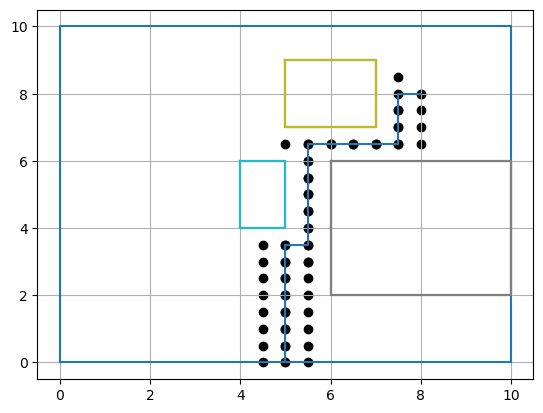

In [26]:
expandidos = []
wall_E3 = RobotHeur([5,0])

wall_E3.agrega_obstaculo(Obstaculo([6,6],[10,2]))
wall_E3.agrega_obstaculo(Obstaculo([5,9],[7,7]))
wall_E3.agrega_obstaculo(Obstaculo([4,6],[5,4]))
dibujar([8,8])
for obstaculo in wall_E3.obstaculos:
    obstaculo.dibuja()

wall_E3.plot_robot()

wall_E3.BGREEDY(meta=[8,8])
plt.plot(wall_E3.trajectory[0::2], wall_E3.trajectory[1::2])

for p in expandidos:
    plt.scatter(p.pos[0], p.pos[1], c="k")

print(f" expandidos {len(expandidos)}")

metaaaaaaa
 expandidos 445


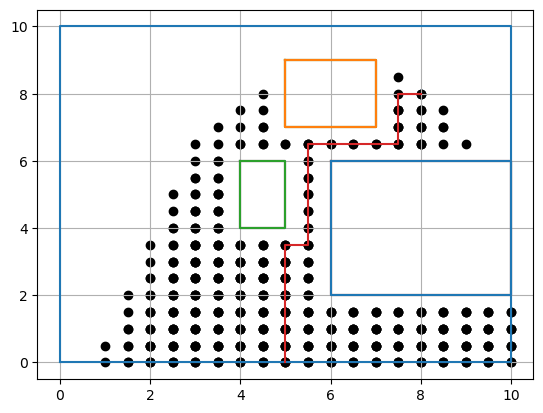

In [27]:
expandidos = []
wall_E4 = RobotHeur([5,0])

wall_E4.agrega_obstaculo(Obstaculo([6,6],[10,2]))
wall_E4.agrega_obstaculo(Obstaculo([5,9],[7,7]))
wall_E4.agrega_obstaculo(Obstaculo([4,6],[5,4]))
dibujar([8,8])
for obstaculo in wall_E4.obstaculos:
    obstaculo.dibuja()

wall_E4.plot_robot()

wall_E4.ASTAR(meta=[8,8])
plt.plot(wall_E4.trajectory[0::2], wall_E4.trajectory[1::2])

for p in expandidos:
    plt.scatter(p.pos[0], p.pos[1], c="k")

print(f" expandidos {len(expandidos)}")